## Appendix Figure A2: Percent of Forbes 400 members with top 30 public BAs, MBAs, and JDs

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_forbes400_alum_board_1989_2003_2017, clear
gen nonfin=(pehedge!=1 & otherfin!=1 & technology!=1)
gen all=1

In [2]:
local pehedge "private equity & hedge"
local otherfin "other finance"
local technology "technology"
local nonfin "other"
quietly foreach var in pehedge otherfin nonfin technology all {

gen top30bapub`var'=(collegeschooltype==2)*100 if `var'==1
    label var top30bapub`var' "``var''"

gen top30mbapub`var'=(mbaschooltype==2)*100 if `var'==1
    label var top30mbapub`var' "``var''"

gen top30jdpub`var'=(jdschooltype==2)*100 if `var'==1
    label var top30jdpub`var' "``var''"
}

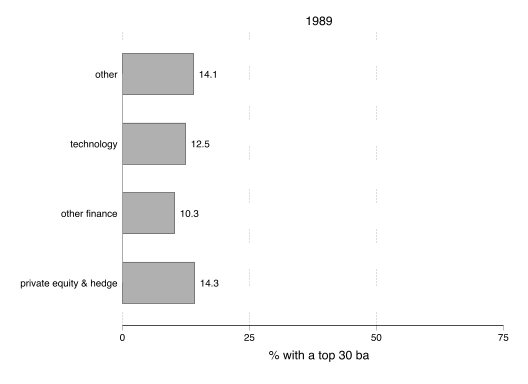

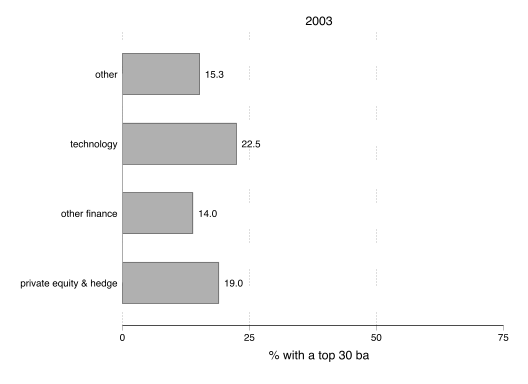

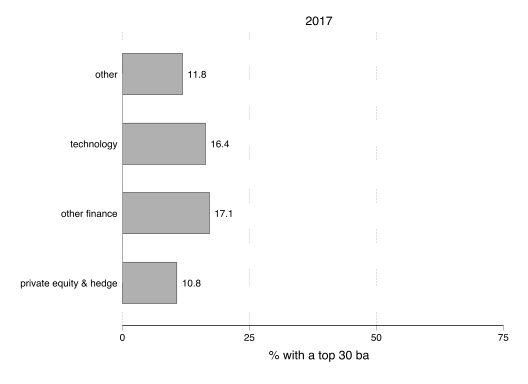

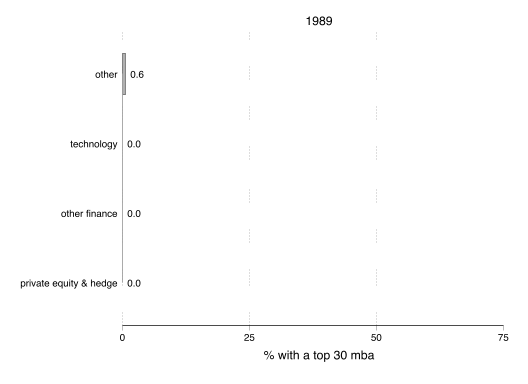

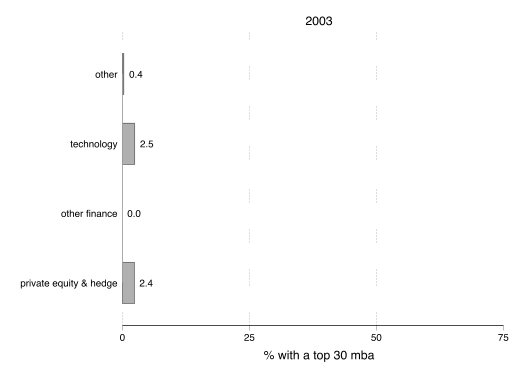

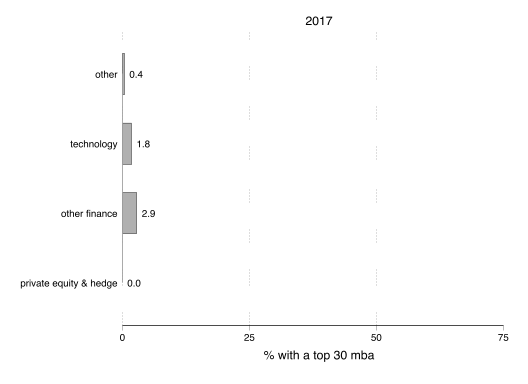

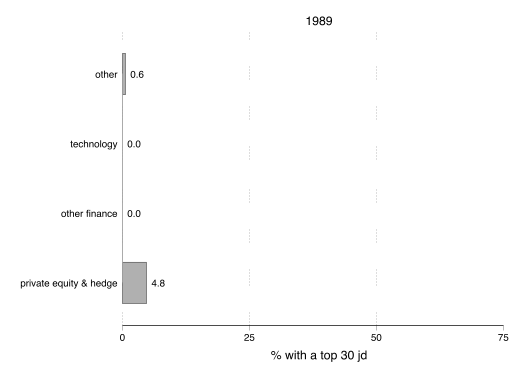

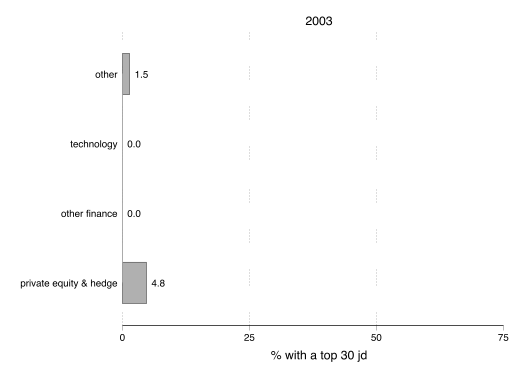

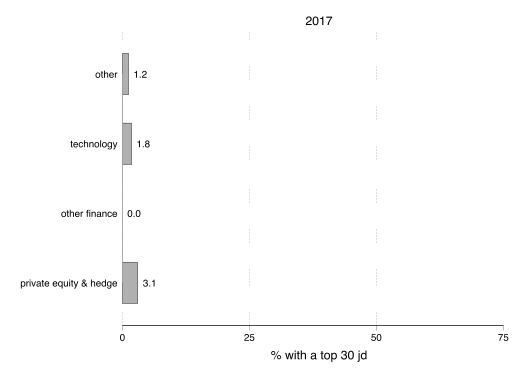

In [3]:
foreach control in pub {
foreach degree in ba mba jd {
foreach year in 1989 2003 2017 {
statplot top30`degree'`control'nonfin top30`degree'`control'tech ///
top30`degree'`control'otherfin top30`degree'`control'pehedge ///
if year==`year', name(top30`degree'`control'`year', replace) blabel(bar, format(%9.1f)) ///
ytitle("% with a top 30 `degree'") title(`year') ylabel(0(25)75) scheme(plotplain)
}
}
}

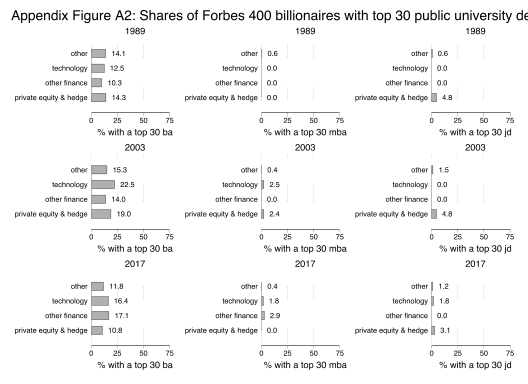

In [4]:
graph combine top30bapub1989 top30mbapub1989 top30jdpub1989 ///
top30bapub2003 top30mbapub2003 top30jdpub2003 ///
top30bapub2017 top30mbapub2017 top30jdpub2017 ///
, xsize(16) ysize(12) scheme(plotplain) imargins(zero) name(Forbes400privatedegrees, replace) ///
title("Appendix Figure A2: Shares of Forbes 400 billionaires with top 30 public university degrees", ///
span justification(left))

In [6]:
graph export figures/fa2_forbes400_public_ba_mba_jd.pdf, replace

file figures/fa2_forbes400_public_ba_mba_jd.pdf saved as PDF format
